# Implementation of face recognition using neural net 

In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import os
import dlib
from skimage import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.


#### Listing the path of all the images

In [3]:
DatasetPath = []
for i in os.listdir("data/yalefaces"):
    DatasetPath.append(os.path.join("data/yalefaces", i))

In [4]:
DatasetPath = DatasetPath[1:]

#### Reading each image and assigning respective labels

In [5]:
imageLabels = []
for i in DatasetPath:   
    labelRead = int(os.path.split(i)[1].split(".")[0].replace("subject", "")) - 1
    imageLabels.append(labelRead)

#### Preprocessing: Face Detection using OpenCV and cropping the image to a size of 150 * 150

In [6]:
faceDetectClassifier = cv2.CascadeClassifier("models/haarcascade_frontalface_default.xml")

In [7]:
imageDataFin = []
for file_name in DatasetPath:
    gray = cv2.imread(file_name,0)

    faces = faceDetectClassifier.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )
    faces = faceDetectClassifier.detectMultiScale(gray, 1.2, 5)

#     print("Found {0} faces!".format(len(faces)))

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(gray, (x, y), (x+w, y+h), (0, 255, 0), 2)
        thing = gray[y: y + w, x: x + h]

    thing = cv2.resize(thing,(150,150))
    imageDataFin.append(thing)

In [8]:
len(imageLabels)

165

#### Splitting Dataset into train and test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(np.array(imageDataFin),np.array(imageLabels), train_size=0.9, random_state = 20)

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [11]:
X_train.shape

(148, 150, 150)

In [12]:
X_test.shape

(17, 150, 150)

In [13]:
nb_classes = 15
nb_train = X_train.shape[0]
nb_test = X_test.shape[0]
y_train = np.array(y_train) 
y_test = np.array(y_test) 

In [14]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

#### Converting each 2d image into 1D vector

In [15]:
X_train = X_train.reshape(nb_train, 150*150)
X_test = X_test.reshape(nb_test, 150*150)

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [17]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (148, 22500)
Testing matrix shape (17, 22500)


#### Defining the model

In [18]:
model = Sequential()
model.add(Dense(512,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               11520512  
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                7695      
__________

In [20]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

#### Training

In [21]:
model.fit(X_train, Y_train, batch_size=64, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Train on 148 samples, validate on 17 samples
Epoch 1/50
148/148 [==============================] - 1s - loss: 7.8237 - acc: 0.0473 - val_loss: 13.9532 - val_acc: 0.0588
Epoch 2/50
148/148 [==============================] - 0s - loss: 11.8982 - acc: 0.1486 - val_loss: 8.5723 - val_acc: 0.2941
Epoch 3/50
148/148 [==============================] - 0s - loss: 10.7463 - acc: 0.1216 - val_loss: 9.5042 - val_acc: 0.0588
Epoch 4/50
148/148 [==============================] - 0s - loss: 11.5454 - acc: 0.1149 - val_loss: 10.4319 - val_acc: 0.1176

#### Evaluating the performance

In [22]:
loss, accuracy = model.evaluate(X_test,Y_test, verbose=0)

In [23]:
loss

0.090713821351528168

In [24]:
accuracy

0.94117647409439087

In [25]:
predicted_classes = model.predict_classes(X_test)

17/17 [==============================] - 0s


In [26]:
correct_classified_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_classified_indices = np.nonzero(predicted_classes != y_test)[0]

In [27]:
correct_classified_indices

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [28]:
incorrect_classified_indices

array([0])

predicted value:  4
actual value:  13


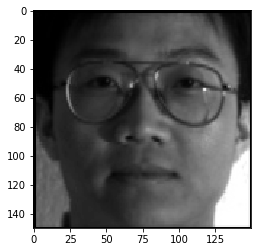

In [29]:
plt.imshow(X_test[incorrect_classified_indices[0]].reshape(150,150),cmap='gray')
print('predicted value: ',predicted_classes[incorrect_classified_indices[0]])
print('actual value: ',y_test[incorrect_classified_indices[0]])